In [1]:
import numpy as np

In [2]:
#Loading, visualizing and analyzing the training data 
#we generated for our RNN

rnn_data_file = "../trained_models_folder_ski/rnn_training_data.npz"
rnn_data = np.load(rnn_data_file,allow_pickle=True)
print(rnn_data.files)

['action', 'latent']


In [3]:
#All actions and latent vectors from observations, lined up correctly
action_file = rnn_data['action']
latent_file = rnn_data['latent']



In [4]:
print(action_file.shape)
print(latent_file.shape)

(1900,)
(1900,)


In [5]:
one_episode_latents = np.array(latent_file[12])
one_episode_actions = np.array(action_file[12])
print(one_episode_latents.shape)
print(one_episode_actions.shape)
print(one_episode_latents)

(2100, 64)
(2100,)
[[-0.02317591  0.00864253 -0.00978272 ...  0.04467591  0.16804597
  -0.00312159]
 [-0.02272616  0.01160098 -0.01114855 ...  0.04745832  0.21607456
  -0.00703015]
 [-0.02127648  0.00825688 -0.00781321 ...  0.04323876  0.14507553
  -0.00097329]
 ...
 [-0.00895563  0.00196484 -0.00260987 ...  0.02942172 -0.1939838
  -0.00879406]
 [-0.00758895  0.00518262 -0.00522994 ...  0.02867582 -0.15063351
  -0.01140026]
 [-0.00384689  0.00758352 -0.00430194 ...  0.02987939 -0.12220892
  -0.01186602]]


In [6]:
#Checking what is in the action data.
print(one_episode_actions[:50])

[2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 0 0 1 1 1 1 1 1 0 2 2]


In [14]:
#Decoding latents to check.

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf_config = tf.compat.v1.ConfigProto()
tf_config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=tf_config)
import tensorflow.compat.v1.keras.backend as K
K.set_session(sess)

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 1.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    #fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    fig = plt.figure(figsize=(128,128), dpi=0.5)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(1-image_array[i]) #NOTE: The 1- is a trick to invert img colors
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))
    
import os
import sys


#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
#Importing the VAE
from VAE.world_model_vae import VAE
#Loading Weights of trained VAE
vae = VAE()
vae.set_weights("../trained_models_folder_ski/final_full_vae_weights.h5")
regenerated_images = vae.decoder.predict(one_episode_latents)
plot_movie_mp4(regenerated_images)

/itf-fi-ml/home/kaiolae/test_project/WorldModels
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
Model: "VAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 32, 32, 32)   416         conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 16, 16, 32)   4128   

/storage/software/TensorFlow/2.4.1-fosscuda-2020b/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


<Figure size 64x64 with 0 Axes>

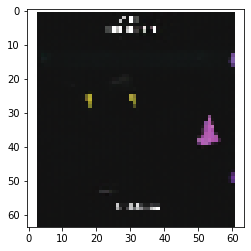

In [13]:
#print(one_episode_latents.shape)
#print(one_episode_latents[0])
plt.imshow(regenerated_images[120])
plt.show()

In [15]:
plot_movie_mp4(regenerated_images)

<Figure size 64x64 with 0 Axes>